In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/all_stocks_5yr.csv', parse_dates=True)
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<AxesSubplot:>

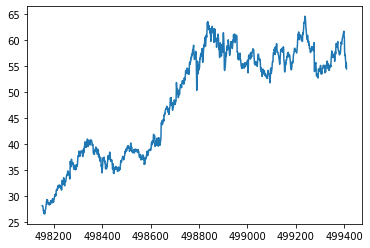

In [4]:
sbux['close'].plot()

### Calculating the return of SBUX

- Will need the current price and previous close price to calculate

In [5]:
# Shifting the data by one row on a new 'prev_close' column to begin calculating the return

sbux['prev_close'] = sbux['close'].shift(1)

In [6]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [7]:
# Calculating the return for each day in a new column

sbux['return'] = sbux['close'] / sbux['prev_close'] -1

In [8]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [9]:
# Another way to calculate the percent return without a 'previous close' column

sbux['return 2'] = sbux['close'].pct_change(1)

In [10]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return 2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


<AxesSubplot:>

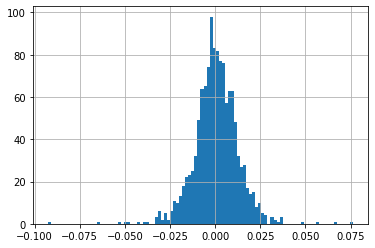

In [12]:
# Using a histogram to visualize the distribution of returns

sbux['return'].hist(bins=100)

In [13]:
# Calculating statistics on the returns (mean and std)

sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [14]:
# Calculating the log return as well (in a new column)

sbux['log_return'] = np.log(sbux['return'] + 1)

In [15]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return 2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


<AxesSubplot:title={'center':'Nearly the same distribution as non-log returns'}, ylabel='Frequency'>

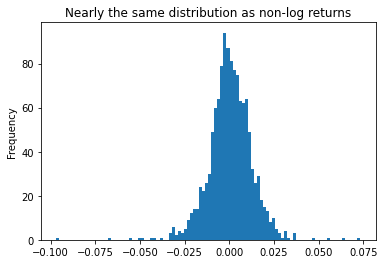

In [18]:
sbux['log_return'].plot(kind='hist', bins=100, title='Nearly the same distribution as non-log returns')

In [19]:
# Mean and STD of log returns

sbux['log_return'].mean(), sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101258)